<a href="https://colab.research.google.com/github/Shaitender/Courses-/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#import libraries
import pandas as pd
import numpy as np

assignment_df = pd.read_excel("/content/Data science - assignment.xlsx",sheet_name="Sheet1")
assignment_df.head(10)

,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,MalePopulation,FemalePopulation,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,MedianAge,MedianAgeMale,MedianAgeFemale,NumberOfBusinesses,NumberOfEmployees,BusinessFirstQuarterPayroll,BusinessAnnualPayroll,DeliveryResidential,DeliveryBusiness,DeliveryTotal,PopulationEstimate,LandArea,WaterArea
0,45274,0,0,0,0,0,0,0.00,0,0,0.0,0.0,0.0,0,0,0,0,0,0,188,0,0.000,0.000
1,45275,0,0,0,0,0,0,0.00,0,0,0.0,0.0,0.0,3,0,0,0,0,0,73,0,0.000,0.000
2,45277,0,0,0,0,0,0,0.00,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0.000,0.000
3,45280,0,0,0,0,0,0,0.00,0,0,0.0,0.0,0.0,2,0,0,0,0,0,15,0,0.000,0.000
4,45296,0,0,0,0,0,0,0.00,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000,0.000
5,45298,0,0,0,0,0,0,0.00,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000,0.000
6,45299,0,0,0,0,0,0,0.00,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.000,0.000
7,45301,130,51,123,1,63,67,2.55,,0,34.0,35.5,32.5,5,154,2398,10075,0,0,197,0,0.092,0.000
8,45302,4280,1448,4236,31,2153,2127,2.96,174700,77750,33.9,34.0,33.8,79,3473,54397,222110,1372,51,1682,4061,50.558,0.076
9,45303,2223,838,2211,6,1114,1109,2.65,94800,58902,37.5,37.5,37.6,31,225,1335,5449,396,6,890,1049,31.764,0.062


In [37]:
assignment_df.shape

(22547, 23)

In [38]:
assignment_df.loc[assignment_df['Population'] == 0].count()


ZipCode                        4154
Population                     4154
HouseholdsPerZipCode           4154
WhitePopulation                4154
BlackPopulation                4154
MalePopulation                 4154
FemalePopulation               4154
PersonsPerHousehold            4154
AverageHouseValue              4154
IncomePerHousehold             4154
MedianAge                      4154
MedianAgeMale                  4154
MedianAgeFemale                4154
NumberOfBusinesses             4154
NumberOfEmployees              4154
BusinessFirstQuarterPayroll    4154
BusinessAnnualPayroll          4154
DeliveryResidential            4154
DeliveryBusiness               4154
DeliveryTotal                  4154
PopulationEstimate             4154
LandArea                       4154
WaterArea                      4154
dtype: int64

In [39]:
assignment_df = assignment_df[assignment_df['Population'] > 0]
assignment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18393 entries, 7 to 22545
Data columns (total 23 columns):
ZipCode                        18393 non-null int64
Population                     18393 non-null int64
HouseholdsPerZipCode           18393 non-null int64
WhitePopulation                18393 non-null int64
BlackPopulation                18393 non-null int64
MalePopulation                 18393 non-null int64
FemalePopulation               18393 non-null int64
PersonsPerHousehold            18393 non-null float64
AverageHouseValue              18393 non-null object
IncomePerHousehold             18393 non-null int64
MedianAge                      18393 non-null float64
MedianAgeMale                  18393 non-null float64
MedianAgeFemale                18393 non-null float64
NumberOfBusinesses             18393 non-null int64
NumberOfEmployees              18393 non-null int64
BusinessFirstQuarterPayroll    18393 non-null int64
BusinessAnnualPayroll          18393 non-null int6

In [40]:
assignment_df.head()

,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,MalePopulation,FemalePopulation,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,MedianAge,MedianAgeMale,MedianAgeFemale,NumberOfBusinesses,NumberOfEmployees,BusinessFirstQuarterPayroll,BusinessAnnualPayroll,DeliveryResidential,DeliveryBusiness,DeliveryTotal,PopulationEstimate,LandArea,WaterArea
7,45301,130,51,123,1,63,67,2.55,,0,34.0,35.5,32.5,5,154,2398,10075,0,0,197,0,0.092,0.000
8,45302,4280,1448,4236,31,2153,2127,2.96,174700,77750,33.9,34.0,33.8,79,3473,54397,222110,1372,51,1682,4061,50.558,0.076
9,45303,2223,838,2211,6,1114,1109,2.65,94800,58902,37.5,37.5,37.6,31,225,1335,5449,396,6,890,1049,31.764,0.062
10,45304,7300,2833,7251,44,3639,3661,2.58,119800,60417,40.8,40.3,41.2,135,819,6657,32718,2955,81,3120,7623,84.875,0.089
11,45305,10712,4029,10113,458,5197,5515,2.65,193900,88651,40.1,40.1,40.1,173,1053,5930,27947,4438,166,4826,11760,14.448,0.100


In [41]:
#checking the sample records 
assignment_df.sample(10)

,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,MalePopulation,FemalePopulation,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,MedianAge,MedianAgeMale,MedianAgeFemale,NumberOfBusinesses,NumberOfEmployees,BusinessFirstQuarterPayroll,BusinessAnnualPayroll,DeliveryResidential,DeliveryBusiness,DeliveryTotal,PopulationEstimate,LandArea,WaterArea
4016,54307,1092,0,463,576,1089,3,0.00,0,0,30.4,30.4,22.5,51,2896,43599,189903,0,0,1001,0,0.073,0.000
13612,76426,11302,3749,9513,315,5869,5433,2.81,132600,49408,35.8,34.9,37.0,297,4974,64126,255874,4078,392,5282,11459,131.558,15.017
7814,62474,848,342,835,8,424,424,2.48,80600,56103,42.1,42.4,41.9,13,42,211,928,237,7,370,587,36.252,0.013
21283,97345,574,241,549,0,309,265,2.36,0,32469,51.1,49.5,52.5,4,0,0,0,169,4,504,398,38.082,0.305
10437,68823,2401,1089,2388,4,1191,1210,2.18,101000,48151,50.4,49.8,51.2,99,611,3756,16391,573,18,1115,1249,929.680,4.538
14628,78368,9227,3239,8311,111,4543,4684,2.83,61900,41830,39.5,38.7,40.2,101,1338,10097,37257,3379,193,4103,9562,216.341,21.897
14276,77598,23059,10615,15239,3526,11550,11509,2.15,138600,52167,29.7,29.4,30.1,1019,22119,203656,860171,11862,1465,13825,25503,12.101,0.199
9693,67057,241,114,239,0,127,114,2.11,56700,40250,50.4,49.5,53.0,8,12,42,203,20,0,142,42,163.821,0.315
7153,61244,24053,9683,18761,3170,12253,11800,2.33,111300,46846,40.0,37.8,42.7,351,7456,85698,358281,9875,471,10565,23008,26.048,1.841
8033,62871,686,285,682,1,341,345,2.41,81000,45000,46.1,45.7,46.6,11,54,336,1454,235,1,274,566,51.066,0.110


In [42]:
assignment_df['AverageHouseValue']= pd.to_numeric(assignment_df['AverageHouseValue'], errors='coerce')
assignment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18393 entries, 7 to 22545
Data columns (total 23 columns):
ZipCode                        18393 non-null int64
Population                     18393 non-null int64
HouseholdsPerZipCode           18393 non-null int64
WhitePopulation                18393 non-null int64
BlackPopulation                18393 non-null int64
MalePopulation                 18393 non-null int64
FemalePopulation               18393 non-null int64
PersonsPerHousehold            18393 non-null float64
AverageHouseValue              18392 non-null float64
IncomePerHousehold             18393 non-null int64
MedianAge                      18393 non-null float64
MedianAgeMale                  18393 non-null float64
MedianAgeFemale                18393 non-null float64
NumberOfBusinesses             18393 non-null int64
NumberOfEmployees              18393 non-null int64
BusinessFirstQuarterPayroll    18393 non-null int64
BusinessAnnualPayroll          18393 non-null int

In [43]:
# Calculate percentage of missing values
print(round(((assignment_df.isnull().sum().sum()/np.product(assignment_df.shape)) * 100), 2))

0.0


In [46]:
'''
As we observe AverageHouseValue has blank value, lets replace it with median value 
(either we can go impute with mean value, depends on bussiness usecase, as its not clear lets go with value)
'''
assignment_df.replace(r'^\s*$', np.nan, regex=True)
assignment_df.isna().sum()

ZipCode                        0
Population                     0
HouseholdsPerZipCode           0
WhitePopulation                0
BlackPopulation                0
MalePopulation                 0
FemalePopulation               0
PersonsPerHousehold            0
AverageHouseValue              1
IncomePerHousehold             0
MedianAge                      0
MedianAgeMale                  0
MedianAgeFemale                0
NumberOfBusinesses             0
NumberOfEmployees              0
BusinessFirstQuarterPayroll    0
BusinessAnnualPayroll          0
DeliveryResidential            0
DeliveryBusiness               0
DeliveryTotal                  0
PopulationEstimate             0
LandArea                       0
WaterArea                      0
dtype: int64

In [47]:
assignment_df=assignment_df.fillna(assignment_df.median())
assignment_df.isna().sum()

ZipCode                        0
Population                     0
HouseholdsPerZipCode           0
WhitePopulation                0
BlackPopulation                0
MalePopulation                 0
FemalePopulation               0
PersonsPerHousehold            0
AverageHouseValue              0
IncomePerHousehold             0
MedianAge                      0
MedianAgeMale                  0
MedianAgeFemale                0
NumberOfBusinesses             0
NumberOfEmployees              0
BusinessFirstQuarterPayroll    0
BusinessAnnualPayroll          0
DeliveryResidential            0
DeliveryBusiness               0
DeliveryTotal                  0
PopulationEstimate             0
LandArea                       0
WaterArea                      0
dtype: int64

In [48]:
''' 
Print Convariance Matrix for all the coloums in data dataframe

Note - Just to avoid notebook big i have used this ( corvarinace between 2 columns can also be calculated)
like this - print(assignment_df.ZipCode.cov(assignment_df.Population))
'''
assignment_df.cov()



,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,MalePopulation,FemalePopulation,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,MedianAge,MedianAgeMale,MedianAgeFemale,NumberOfBusinesses,NumberOfEmployees,BusinessFirstQuarterPayroll,BusinessAnnualPayroll,DeliveryResidential,DeliveryBusiness,DeliveryTotal,PopulationEstimate,LandArea,WaterArea
ZipCode,2.533917e+08,4.415871e+07,1.406343e+07,2.426696e+07,8.450673e+05,2.222711e+07,2.193160e+07,1053.998080,9.435920e+08,5.224130e+06,-9052.008431,-7746.327599,-10546.884133,1.143029e+06,1.503020e+07,2.376744e+08,9.822069e+08,1.546255e+07,1.301133e+06,2.345124e+07,4.751402e+07,6.865774e+05,16384.090645
Population,4.415871e+07,1.949179e+08,6.834099e+07,1.317784e+08,2.112710e+07,9.612193e+07,9.879595e+07,1603.513600,8.231120e+08,8.218282e+07,-40596.403496,-43303.193385,-37657.091887,4.315268e+06,6.804368e+07,7.887565e+08,3.266222e+09,7.588846e+07,5.034882e+06,8.662790e+07,2.118139e+08,-3.501893e+05,-4701.272746
HouseholdsPerZipCode,1.406343e+07,6.834099e+07,2.503696e+07,4.770044e+07,7.451701e+06,3.360713e+07,3.473386e+07,356.748901,3.117067e+08,3.076760e+07,-13234.469839,-14276.534676,-12114.316830,1.637040e+06,2.593598e+07,3.073444e+08,1.269734e+09,2.783200e+07,1.867819e+06,3.167009e+07,7.444956e+07,-1.273822e+05,-1561.578637
WhitePopulation,2.426696e+07,1.317784e+08,4.770044e+07,1.007627e+08,8.771795e+06,6.500017e+07,6.677818e+07,826.112194,5.727661e+08,7.068493e+07,-25890.139018,-27791.819249,-23739.875016,3.145860e+06,4.836723e+07,5.429213e+08,2.252539e+09,5.339606e+07,3.482731e+06,6.090643e+07,1.445924e+08,-2.100517e+05,-2551.621957
BlackPopulation,8.450673e+05,2.112710e+07,7.451701e+06,8.771795e+06,8.658779e+06,1.020690e+07,1.092020e+07,149.408656,2.040718e+07,-1.958319e+06,-5515.515539,-6044.093596,-5056.506536,3.519741e+05,6.296957e+06,7.240347e+07,2.951643e+08,8.137923e+06,5.085834e+05,9.085383e+06,2.251662e+07,-6.791066e+04,-1122.107170
MalePopulation,2.222711e+07,9.612193e+07,3.360713e+07,6.500017e+07,1.020690e+07,4.751299e+07,4.860893e+07,802.783299,4.063051e+08,4.038460e+07,-20299.788625,-21569.847838,-18889.456286,2.130183e+06,3.364971e+07,3.921237e+08,1.622331e+09,3.733398e+07,2.488722e+06,4.264292e+07,1.043388e+08,-1.667941e+05,-2157.653143
FemalePopulation,2.193160e+07,9.879595e+07,3.473386e+07,6.677818e+07,1.092020e+07,4.860893e+07,5.018701e+07,800.730301,4.168069e+08,4.179822e+07,-20296.614870,-21733.345547,-18767.635601,2.185085e+06,3.439397e+07,3.966329e+08,1.643891e+09,3.855449e+07,2.546160e+06,4.398498e+07,1.074751e+08,-1.833952e+05,-2543.619603
PersonsPerHousehold,1.053998e+03,1.603514e+03,3.567489e+02,8.261122e+02,1.494087e+02,8.027833e+02,8.007303e+02,0.234963,3.675406e+03,1.529129e+03,-1.833727,-1.838751,-1.791124,6.172674e+00,1.584459e+01,-2.776144e+03,-9.011961e+03,3.885522e+02,1.353707e+01,5.021388e+02,1.735813e+03,-5.822732e+00,-0.123031
AverageHouseValue,9.435920e+08,8.231120e+08,3.117067e+08,5.727661e+08,2.040718e+07,4.063051e+08,4.168069e+08,3675.405692,3.002331e+10,2.464849e+09,-10456.092314,-5176.444720,-12912.196824,3.091754e+07,4.519115e+08,7.948149e+09,3.216720e+10,3.478122e+08,2.863113e+07,4.238721e+08,9.026328e+08,-3.520349e+06,2776.065704
IncomePerHousehold,5.224130e+06,8.218282e+07,3.076760e+07,7.068493e+07,-1.958319e+06,4.038460e+07,4.179822e+07,1529.129078,2.464849e+09,6.033990e+08,-6433.174832,-5388.460636,-6153.687030,2.810492e+06,4.087281e+07,7.587455e+08,2.987452e+09,3.692580e+07,2.051619e+06,4.426653e+07,9.936321e+07,-5.034328e+05,8.929902


In [49]:
assignment_df.describe()

,ZipCode,Population,HouseholdsPerZipCode,WhitePopulation,BlackPopulation,MalePopulation,FemalePopulation,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,MedianAge,MedianAgeMale,MedianAgeFemale,NumberOfBusinesses,NumberOfEmployees,BusinessFirstQuarterPayroll,BusinessAnnualPayroll,DeliveryResidential,DeliveryBusiness,DeliveryTotal,PopulationEstimate,LandArea,WaterArea
count,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000,1.839300e+04,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000,1.839300e+04,1.839300e+04,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000,18393.000000
mean,70493.048062,9004.177731,3333.634970,6777.951177,860.320774,4462.102593,4542.075137,2.528855,1.665691e+05,52792.013320,40.966134,40.219681,41.660257,222.657043,3446.313217,4.237586e+04,1.729049e+05,3579.761594,237.023813,4555.534877,9440.825531,122.459022,2.439756
std,15918.283362,13961.299196,5003.694592,10038.063622,2942.580335,6892.966972,7084.279398,0.484729,1.732724e+05,24564.181011,7.353756,7.585599,7.406600,395.880391,7638.931555,1.447953e+05,5.515699e+05,5621.532447,458.745017,6589.775588,15364.033800,331.594786,16.638177
min,45301.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.002000,0.000000
25%,56721.000000,594.000000,233.000000,513.000000,3.000000,304.000000,288.000000,2.310000,8.190000e+04,40662.000000,36.500000,35.500000,37.300000,9.000000,44.000000,2.840000e+02,1.301000e+03,119.000000,2.000000,352.000000,286.000000,14.615000,0.021000
50%,68812.000000,2113.000000,825.000000,1848.000000,20.000000,1068.000000,1047.000000,2.490000,1.219000e+05,51247.000000,41.000000,40.100000,41.800000,38.000000,297.000000,2.296000e+03,1.025300e+04,660.000000,15.000000,1242.000000,1649.000000,52.501000,0.231000
75%,83127.000000,11579.000000,4343.000000,8844.000000,354.000000,5788.000000,5808.000000,2.690000,1.911000e+05,63459.000000,45.400000,44.800000,46.200000,248.000000,3055.000000,2.642300e+04,1.133840e+05,4752.000000,251.000000,6286.000000,12151.000000,122.073000,1.228000
max,99929.000000,113916.000000,37865.000000,93876.000000,71466.000000,56240.000000,57845.000000,18.500000,2.000000e+06,250000.000000,86.500000,84.800000,86.900000,4192.000000,159361.000000,5.183417e+06,1.615605e+07,40965.000000,6140.000000,50946.000000,126949.000000,13430.989000,956.210000


3. Finding Outliers in the data set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21ecda3b70>,
      dtype=object)

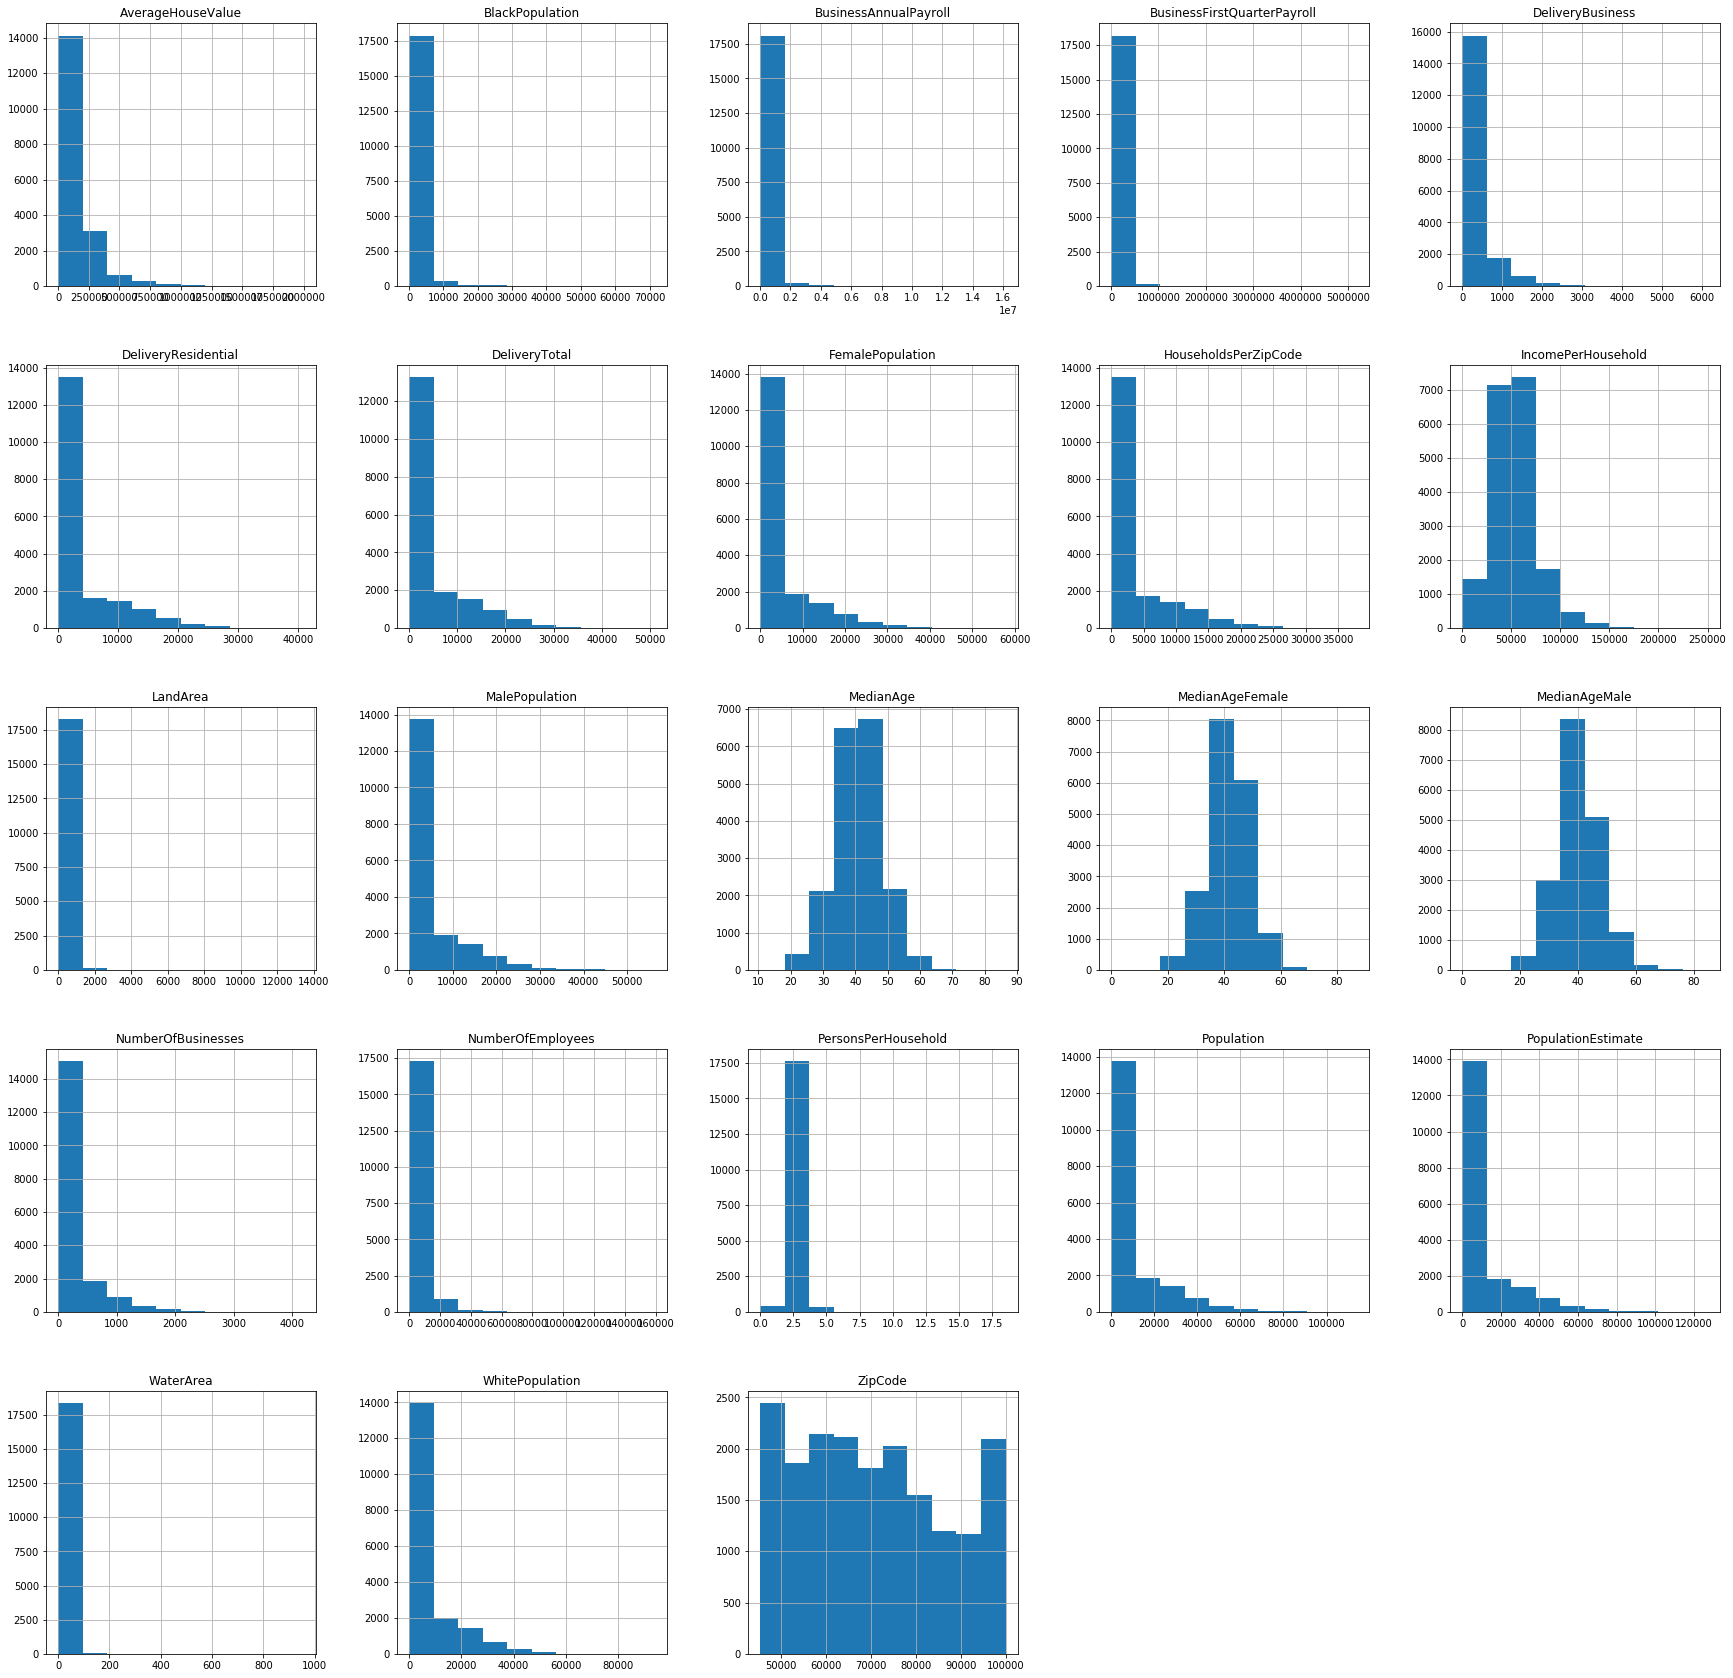

In [50]:
#visualize the distribution
assignment_df[assignment_df.columns].hist(figsize=(30,30))

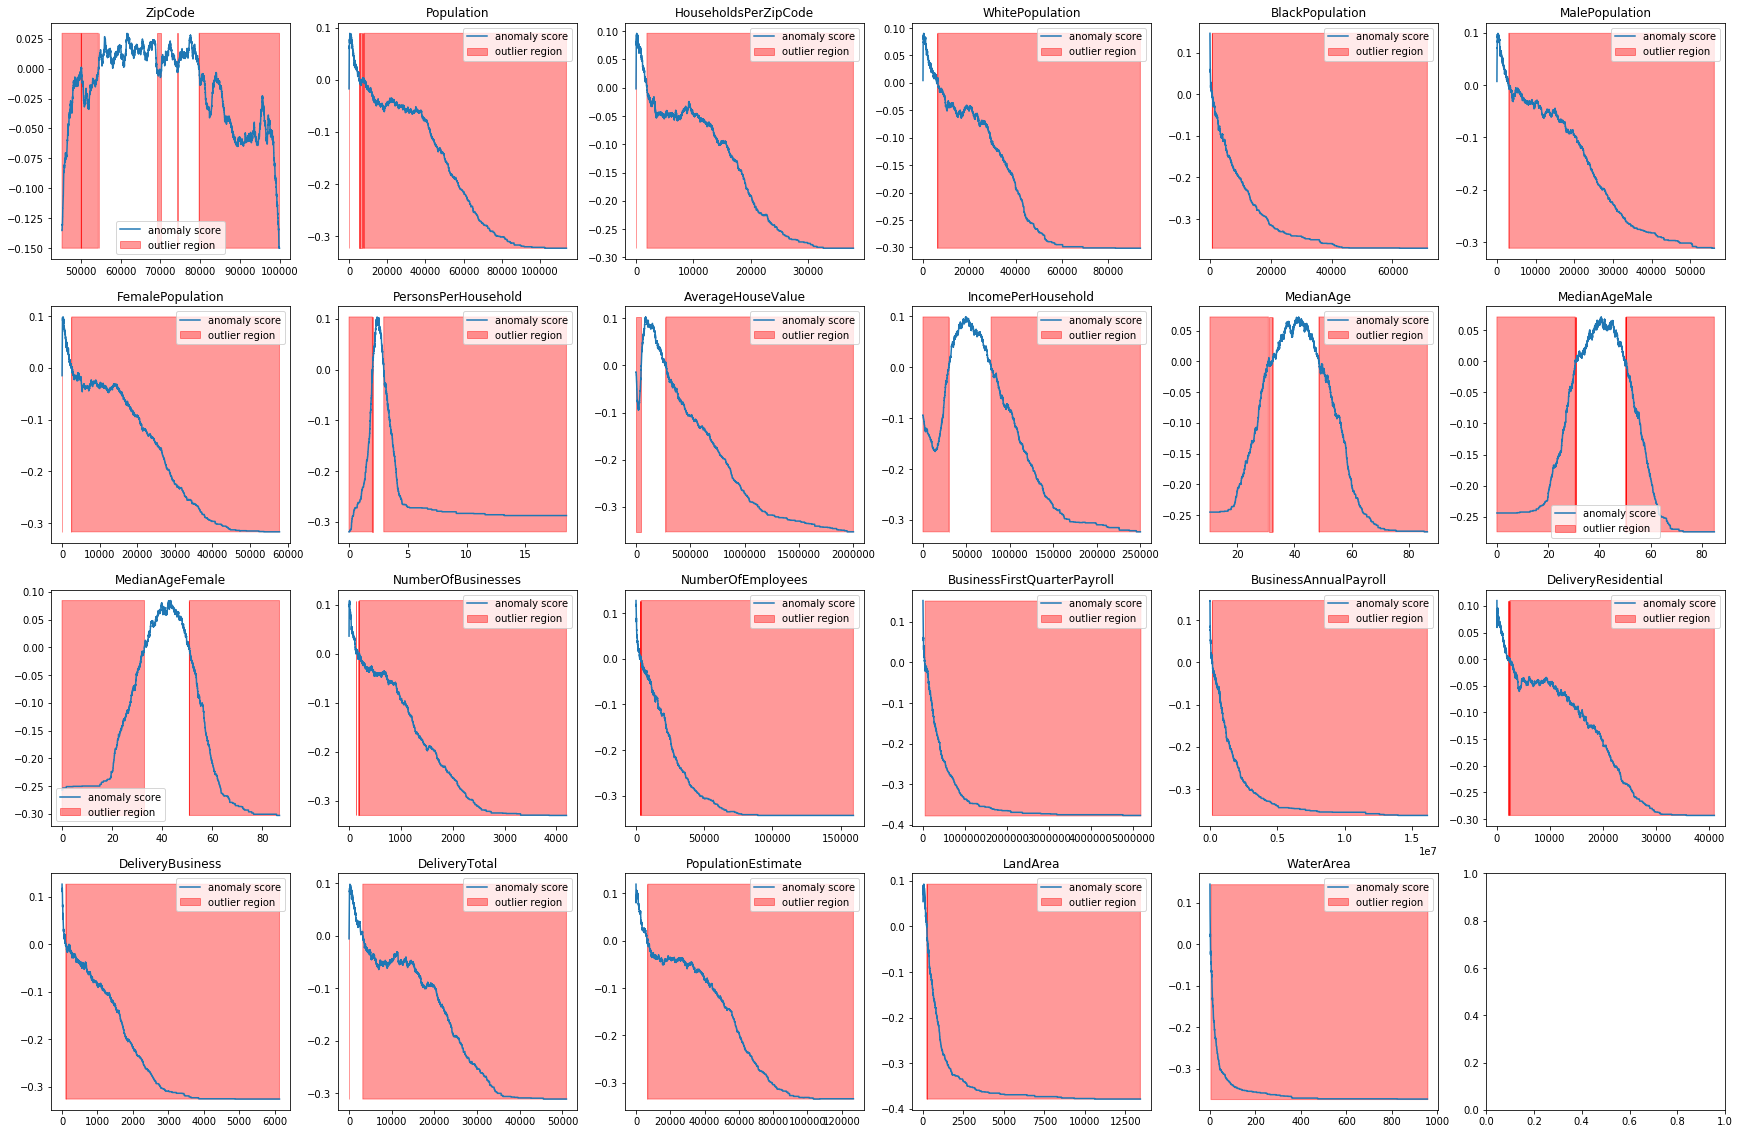

In [62]:
#Let try to use IsolationForest algothrim. It returns an anomaly_score for each data point
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN

fig, axs = plt.subplots(4, 6, figsize=(30, 20), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(assignment_df.columns):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(assignment_df[column].values.reshape(-1,1))

    xx = np.linspace(assignment_df[column].min(), assignment_df[column].max(), len(assignment_df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    #print(xx)
    #print(outlier)
    #print(anomaly_score)
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

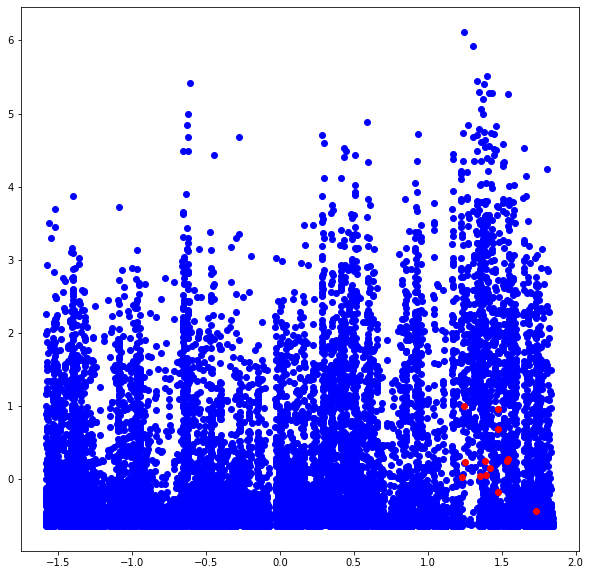

In [66]:
# let use dbscan to detect the outliers
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(assignment_df.values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

plt.figure(figsize=(10,10))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);

In [0]:
#localoutlier can also be used to detect the same for mutivariate dataset

''' if you want to like to univariate analyis, it can be done by 
1. zscore, 2 IQR , 3 Modified Zscore '''